In [1]:
import numpy as np
from matplotlib import pyplot as mpl
from struct import pack
%matplotlib inline

r1k = np.arange(1024)
rpi = np.arange(1024) * np.pi / 1024

allEnv = {}

def show(name, r):
    allEnv[name] = r
    mpl.plot(r)
    mpl.show()
    
def saveAll(fileout):
    def header(count):
        return pack("<4sBxH",
             b"Envt",1, count)
    def table(key, values):
        print("saving", key)
        return pack("<12s1024f", key, *values)
    
    with open(fileout, "wb") as fd:
        fd.write(header(len(allEnv)))
        for k, v in allEnv.items():
            fd.write(table(k, v))

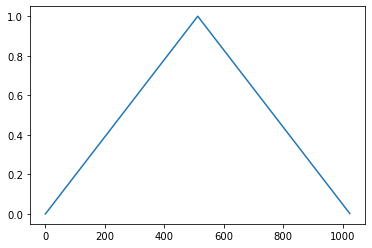

In [2]:
env = np.concatenate([np.arange(512), np.arange(512, 0, -1)]) / 512.
show(b"triangle", env)

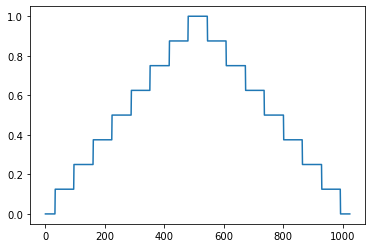

In [3]:
env = np.round(allEnv[b"triangle"] * 8) / 8
show(b"tri_step", env)

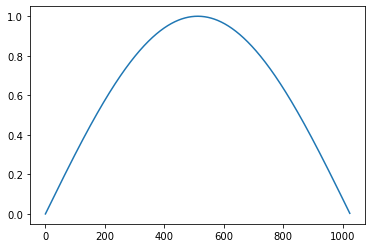

In [4]:
env = np.sin(rpi)
show(b"sine", env)

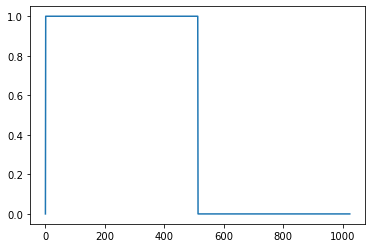

In [5]:
env = ((np.sin(rpi * 2) )> 0) * 1.0
show(b"square", env)

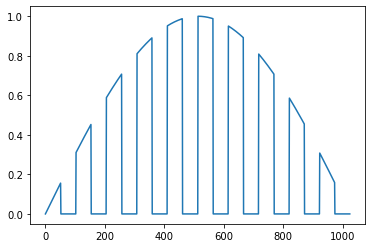

In [6]:
env = allEnv[b"sine"] * ((np.sin(rpi * 20) )> 0)
show(b"xord_sine", env)

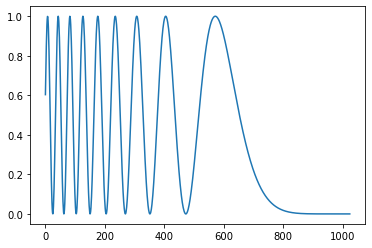

In [7]:
env = 0.5 - (np.cos((rpi)**3.5) / 2)[::-1]
show(b"slowersine", env)

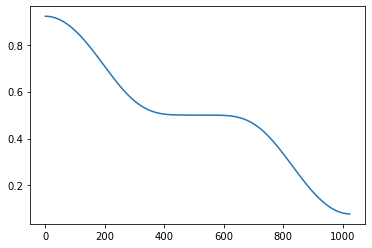

In [8]:
env = np.sin(np.cos(rpi))**5 + 0.5
show(b"smoothStepFall", env)

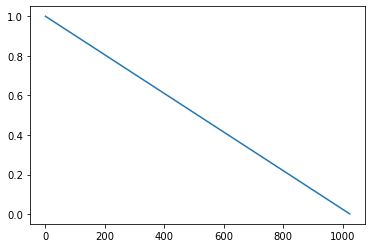

In [9]:
env = 1 - r1k / 1024
show(b"decay", env)

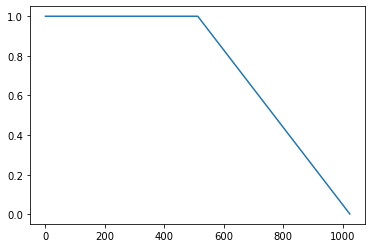

In [10]:
env = np.minimum(2 - 2*r1k / 1024, 1.0)
show(b"sustainRelease", env)

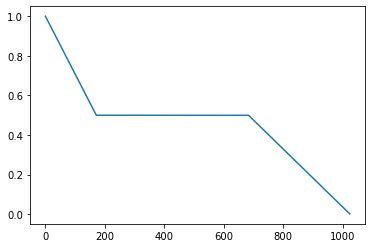

In [11]:
env = np.concatenate([np.maximum(1 - 3*r1k / 1024, 0.5)[:512], np.minimum(1.5-1.5*r1k / 1024, 0.5)[512:]])
show(b"DSR", env)

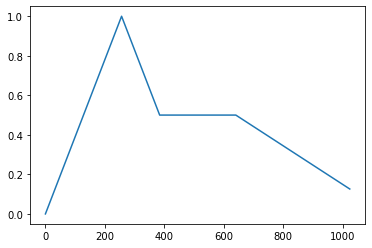

In [12]:
env = np.concatenate([(4*r1k / 1024)[:256], (1-4*r1k / 1024)[:128], np.ones(256)*0.5, (0.5 -r1k / 1024)[:384]])
show(b"ADSR", env)

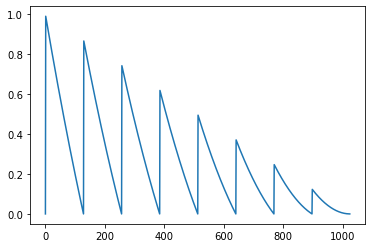

In [13]:
env = ((1 - 8*r1k / 1024)%1) * (1 - r1k/1024)
show(b"tridecay", env)

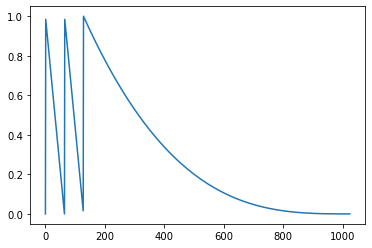

In [14]:
env = np.concatenate([((1 - 16*r1k / 1024)%1)[:128], (1 - np.arange(896)/896)**3])
show(b"clap", env)

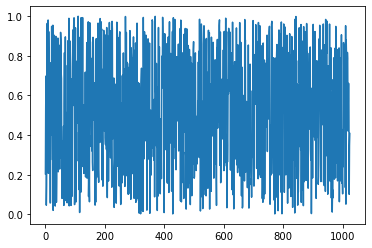

In [15]:
env = np.random.ranf(1024)
show(b"noise", env)

In [17]:
from IPython.display import display
import ipywidgets as widgets


def clicked(arg):
    saveAll("bank1.envt")

export_file = widgets.Button(description = 'Save file')   
export_file.on_click(clicked)
display(export_file)


Widget Javascript not detected.  It may not be installed or enabled properly.


saving b'triangle'
saving b'tri_step'
saving b'sine'
saving b'square'
saving b'xord_sine'
saving b'slowersine'
saving b'smoothStepFall'
saving b'decay'
saving b'sustainRelease'
saving b'DSR'
saving b'ADSR'
saving b'tridecay'
saving b'clap'
saving b'noise'
